In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import networkx as nx
import random
import math
import numpy as np

# 1st PART

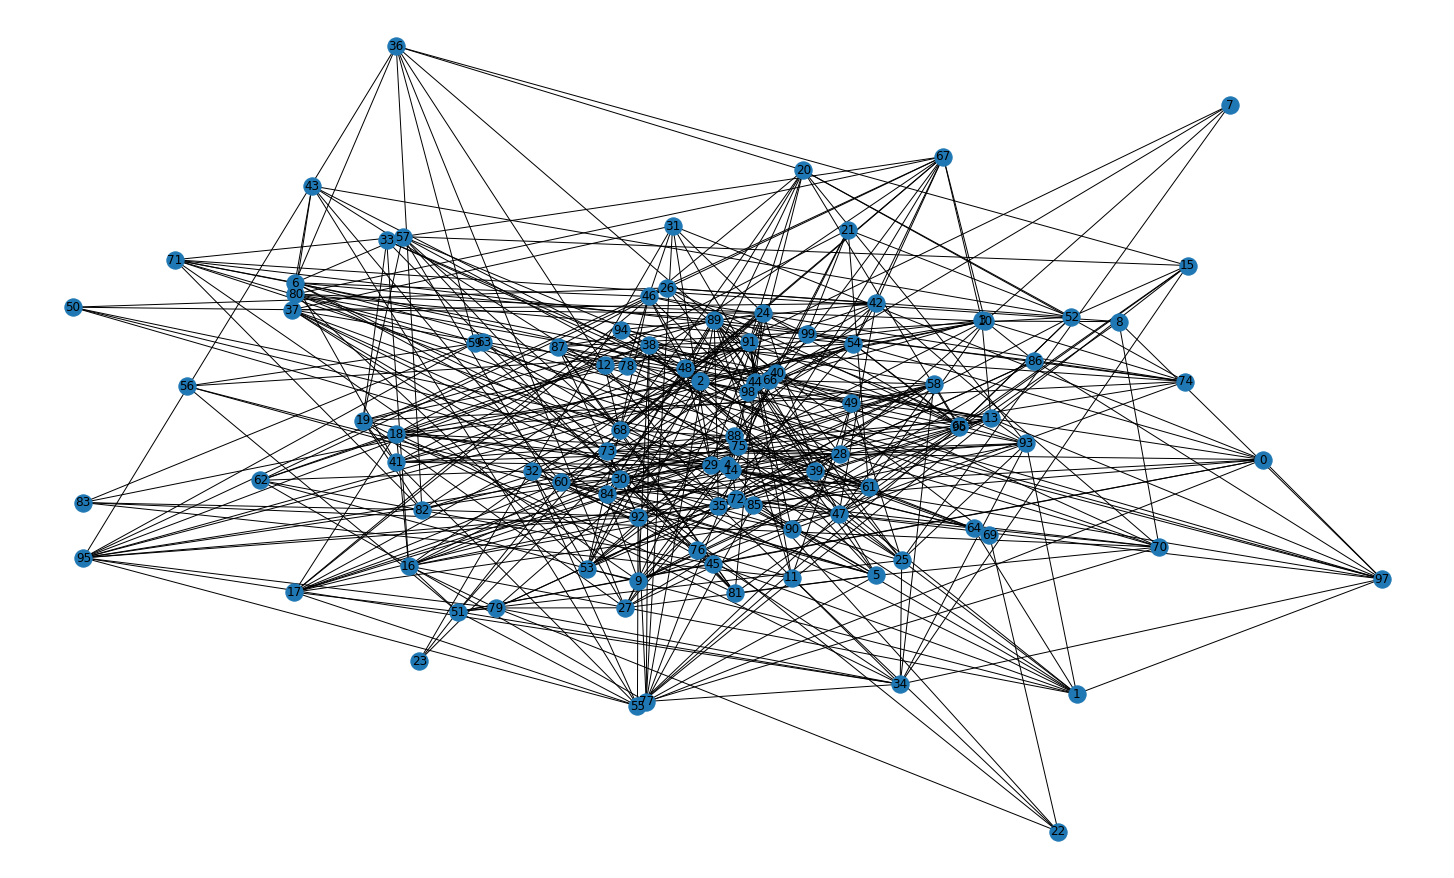

In [2]:
seed = 43
g = nx.Graph()
g.add_nodes_from(range(100))
random.seed(seed)
edges = random.choices([[x, y] for x in range(100) for y in range(x + 1, 100)], k=500)
edges = [edge + [{'weight': random.random() + 0.001}] for edge in edges]  # add weight
g.add_edges_from(edges)

plt.figure(figsize=(20, 12))
nx.draw_kamada_kawai(g, with_labels=True)

Dijkstra algorithm

In [3]:
%%timeit -n 1 -r 10
nx.algorithms.shortest_paths.single_source_dijkstra(g, 0, 80)

521 µs ± 121 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


Bellman-Ford algorithm

In [4]:
%%timeit -n 1 -r 10
nx.algorithms.shortest_paths.single_source_bellman_ford(g, 0, 80)

1.77 ms ± 572 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


# 2nd PART

In [5]:
random.seed(seed)
grid = [1] * (10 * 20 - 40) + [0] * 40
random.shuffle(grid)
grid = np.array(grid).reshape(10, 20)
grid

array([[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]])

In [6]:
def A_star_alg(grid, p1, p2):
    metric = lambda point1, point2: (point1[0] - point2[0]) ** 2 + (point1[1] + point2[1]) ** 2
#     metric = lambda point1, point2: abs(point1[0] - point2[0]) + abs(point1[1] + point2[1])
    h = lambda p: metric(p, p2)
    visited = set((p1,))
    path = [p1]
    score = 0
    while True:
        cands = []
        vals = []
        i, j = path[- 1]
        for ni in range(i - 1, i + 2):
            if ni < 0 or ni == len(grid): continue
            for nj in range(j - 1, j + 2):
                if nj < 0 or nj == len(grid[0]) or grid[ni][nj] == 0 or (ni, nj) in visited: continue
                val = score + metric((i, j), (ni, nj)) + metric((ni, nj), p2)
                if ni == p2[0] and nj == p2[1]:
                    return val, path + [p2]
                cands.append((ni, nj))
                vals.append(val)
        if not cands:
            break
        ind = np.argmin(vals)
        score += vals[ind]
        path.append(cands[ind])
        visited.add(cands[ind])
    return - 1, []

In [7]:
%%timeit -n 1 -r 5
p1 = (random.randint(0, len(grid) - 1), random.randint(0, len(grid[1]) - 1))
p2 = (random.randint(0, len(grid) - 1), random.randint(0, len(grid[1]) - 1))
while p1 == p2: (random.randint(0, len(grid) - 1), random.randint(0, len(grid[1]) - 1))

print(p1, p2, A_star_alg(grid, p1, p2))

(4, 2) (7, 10) (19234583730454798704, [(4, 2), (3, 1), (4, 0), (3, 0), (2, 0), (2, 1), (1, 1), (0, 0), (0, 1), (1, 2), (2, 2), (3, 3), (4, 3), (5, 2), (6, 1), (7, 0), (8, 0), (9, 0), (9, 1), (8, 2), (7, 1), (7, 2), (6, 2), (6, 3), (7, 3), (8, 3), (9, 2), (9, 3), (8, 4), (7, 4), (6, 4), (5, 3), (5, 4), (4, 4), (3, 4), (2, 3), (1, 3), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (4, 5), (5, 5), (6, 5), (6, 6), (5, 6), (6, 7), (7, 7), (8, 6), (8, 5), (9, 4), (9, 5), (9, 6), (8, 7), (9, 7), (9, 8), (8, 9), (7, 10)])
(2, 10) (3, 0) (186357, [(2, 10), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0)])
(3, 15) (2, 9) (39249, [(3, 15), (2, 14), (2, 13), (2, 12), (2, 11), (2, 10), (2, 9)])
(9, 14) (4, 15) (-1, [])
(7, 9) (8, 15) (-1, [])
The slowest run took 6.89 times longer than the fastest. This could mean that an intermediate result is being cached.
984 µs ± 588 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
